In [38]:
import os
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [53]:
# Read reference image
refile = "original.jpg"
print("Reading reference image : " ,refile)
im1 = cv2.imread(refile , cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1 , cv2.COLOR_BGR2RGB)

# Read image to be aligned
imFilename = "scanned.jpg"
print("Reading image to align:", imFilename)
im2 = cv2.imread(imFilename, cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Reading reference image :  original.jpg
Reading image to align: scanned.jpg


In [54]:
im1.shape

(774, 617, 3)

In [26]:
#resized_im2 = cv2.resize(im2, dsize=(990,401), interpolation=cv2.INTER_AREA)

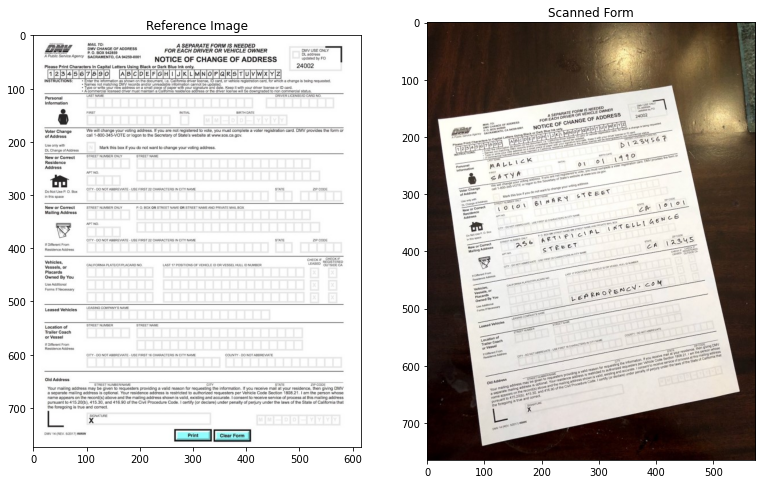

In [55]:
#displaying images
plt.figure(figsize=(20,10))

plt.subplot(131); plt.title("Reference Image"); plt.imshow(im1)
plt.subplot(132); plt.title("Scanned Form"); plt.imshow(im2)

In [56]:
#convert images to grayscale
im1_gray = cv2.cvtColor(im1 , cv2.COLOR_BGR2GRAY)
im2_gray = cv2.cvtColor(im2 , cv2.COLOR_BGR2GRAY)

#detect ORB features and compute descriptors
max_num_features = 500
orb = cv2.ORB_create(max_num_features)

keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

# Display
im1_display = cv2.drawKeypoints(im1, keypoints1, outImage=np.array([]), 
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

im2_display = cv2.drawKeypoints(im2, keypoints2, outImage=np.array([]), 
                                color=(255, 0, 0), flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


How to use the cv2.ORB_create() function to detect and describe features in an image using the ORB algorithm.

The first line of code creates an ORB object with the specified maximum number of features to retain. The second line of code detects and describes features in the first image, im1_gray, and stores the results in the variables keypoints1 and descriptors1.

The third line of code draws the keypoints on the first image and returns the resulting image in the variable im1_display. The cv2.drawKeypoints() function takes the following arguments:

image: The input image.

keypoints: A list of keypoints detected in the image.

outImage: The output image. If None, a new image will be created.

color: The color to draw the keypoints.

flags: A set of flags that control how the keypoints are drawn.

In this case, we are setting the flags argument to cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS, which tells the function to draw the keypoints as circles with a color that indicates the orientation of the keypoint.

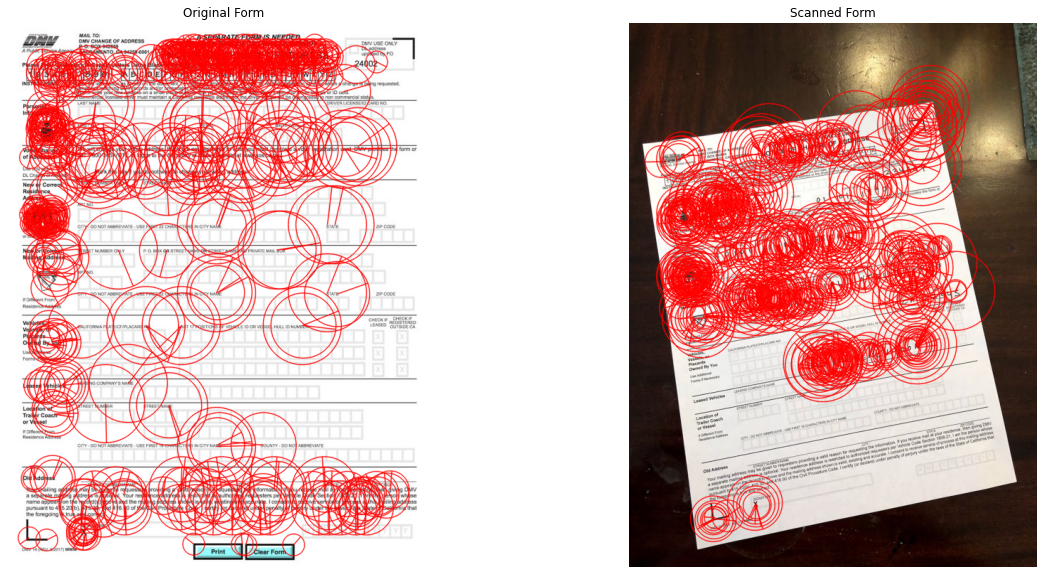

In [57]:
plt.figure(figsize=[20,10])
plt.subplot(121); plt.axis('off'); plt.imshow(im1_display); plt.title("Original Form");
plt.subplot(122); plt.axis('off'); plt.imshow(im2_display); plt.title("Scanned Form");

Matching keypoints in two images

In [58]:
#match features
matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)

# Converting to list for sorting as tuples are immutable objects.
matches = list(matcher.match(descriptors1, descriptors2, None))

# Sort matches by score
matches.sort(key=lambda x: x.distance, reverse=False)

# Remove not so good matches
numGoodMatches = int(len(matches) * 0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Original Form')

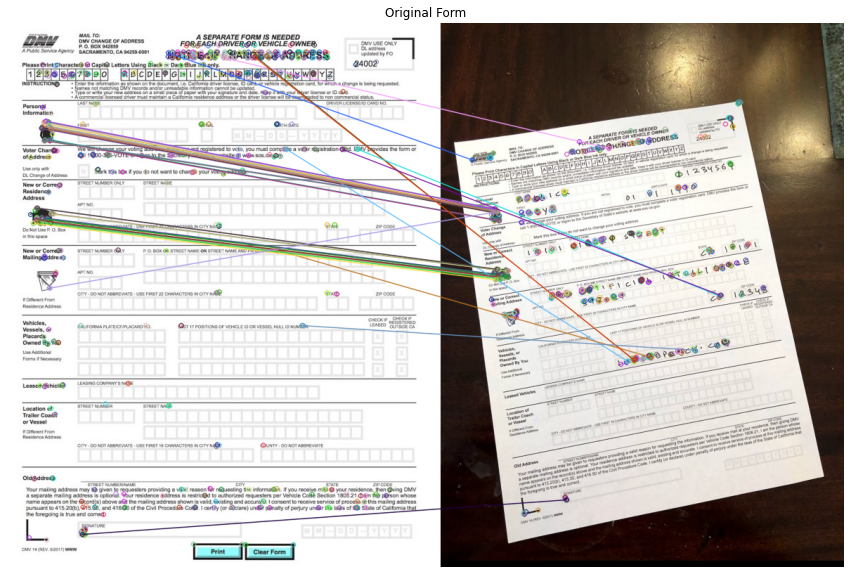

In [59]:
# Draw top matches
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, matches, None)

plt.figure(figsize=[40, 10])
plt.imshow(im_matches);plt.axis("off");plt.title("Original Form")

Find Homography

In [60]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = keypoints1[match.queryIdx].pt
    points2[i, :] = keypoints2[match.trainIdx].pt

# Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Wrap Image

Text(0.5, 1.0, 'Scanned Form')

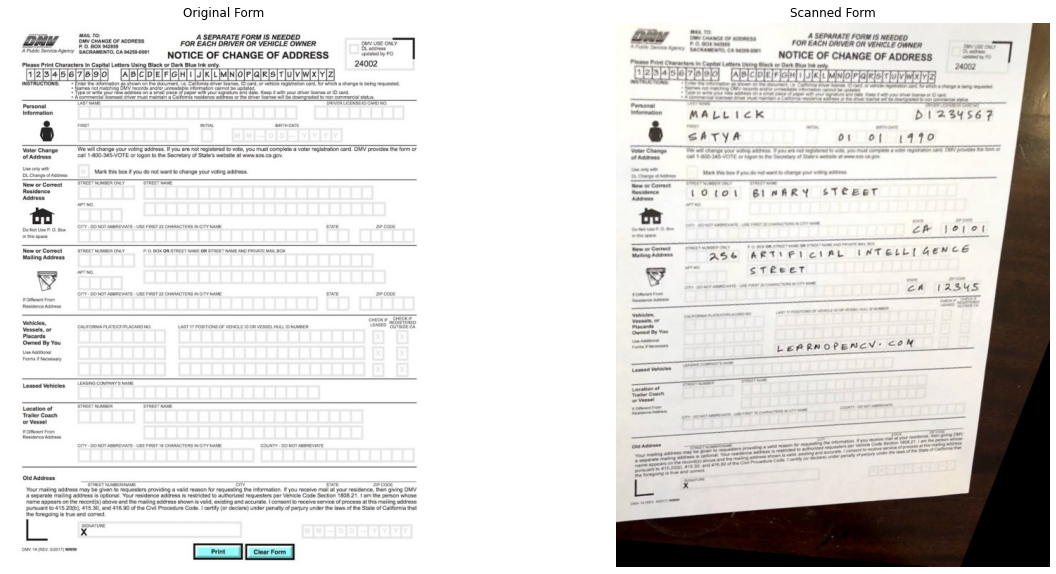

In [61]:
# Use homography to warp image
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

# Display results
plt.figure(figsize=[20, 10])
plt.subplot(121);plt.imshow(im1);    plt.axis("off");plt.title("Original Form")
plt.subplot(122);plt.imshow(im2_reg);plt.axis("off");plt.title("Scanned Form")